# The following code implements Algorithm 6 EstimateFractalDimension Page 67 of Gerald Friedland: "Information-Driven Machine Learning", Springer-Nature, 2023.

## https://link.springer.com/book/10.1007/978-3-031-39477-5

### The code is written by Neil Patel and released into public domain for demonstration purposes only, use at your own risk.  I appreciate a citation of this repository or the book, whatever fits best.

### Estimating the fractal dimension of a curve. Given a binarized image of a curve, the function returns the estimated fractal dimension D fractal, the largest magnification 1, and the number of boxes counted at that magnification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
def generate_curve(power, num_points=1000):
    # Generate x values
    x = np.linspace(0, 1, num_points)
    # Generate y values using a polynomial function
    y = x ** power
    return x, y

def box_counting_dimension(x, y, num_boxes):
    # Find the bounding box of the curve
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    # Calculate box sizes
    box_sizes = np.logspace(np.log10(1/num_boxes), np.log10(x_max - x_min), num_boxes)
    # Count the number of boxes containing part of the curve
    counts = []
    for size in box_sizes:
        num_boxes_x = int((x_max - x_min) / size)
        num_boxes_y = int((y_max - y_min) / size)
        grid = np.zeros((num_boxes_x, num_boxes_y))
        for i in range(num_boxes_x):
            for j in range(num_boxes_y):
                x_mask = np.logical_and(x >= (x_min + i * size), x < (x_min + (i + 1) * size))
                y_mask = np.logical_and(y >= (y_min + j * size), y < (y_min + (j + 1) * size))
                grid[i, j] = np.sum(np.logical_and(x_mask, y_mask))
        counts.append(np.count_nonzero(grid))
    # Fit a line to the log-log plot of box sizes vs. counts
    slope, intercept, _, _, _ = linregress(np.log(box_sizes), np.log(counts))
    return slope



In [5]:
def main():
    power = float(input("Enter the power of the polynomial function: "))
    num_points = int(input("Enter the number of points to generate: "))
    num_boxes = int(input("Enter the number of boxes for box counting: "))
    
    # Generate the curve
    x, y = generate_curve(power, num_points)
    
    # Plot the curve
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'b.')
    plt.title("Generated Curve (Power = {})".format(power))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()
    
    # Calculate and print the fractal dimension
    dimension = box_counting_dimension(x, y, num_boxes)
    print("Fractal dimension:", dimension)

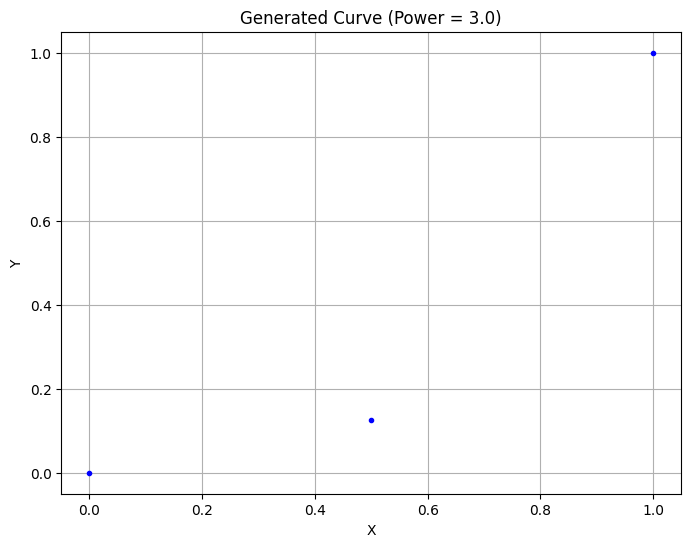

Fractal dimension: -0.6309297535714573


In [6]:
main()

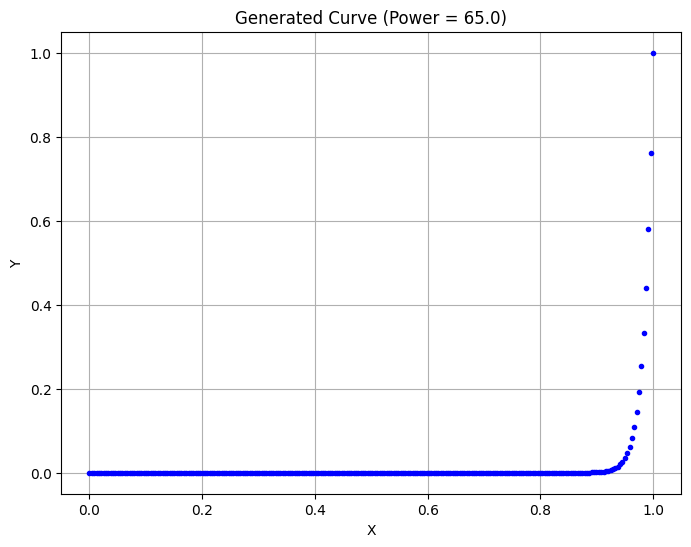

ValueError: Cannot calculate a linear regression if all x values are identical

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def generate_curve(power, num_points=1000):
    # Generate x values
    x = np.linspace(0, 1, num_points)
    # Generate y values using a polynomial function
    y = x ** power
    return x, y

def box_counting_dimension(x, y, num_boxes):
    # Find the bounding box of the curve
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    
    # Calculate box sizes
    box_sizes = np.logspace(np.log10(min(x_max - x_min, y_max - y_min) / num_boxes), 
                            np.log10(min(x_max - x_min, y_max - y_min) / 2), num_boxes)
    
    counts = []
    for size in box_sizes:
        num_boxes_x = int(np.ceil((x_max - x_min) / size))
        num_boxes_y = int(np.ceil((y_max - y_min) / size))
        grid = np.zeros((num_boxes_x, num_boxes_y))
        
        for i in range(num_boxes_x):
            for j in range(num_boxes_y):
                x_mask = np.logical_and(x >= (x_min + i * size), x < (x_min + (i + 1) * size))
                y_mask = np.logical_and(y >= (y_min + j * size), y < (y_min + (j + 1) * size))
                grid[i, j] = np.sum(np.logical_and(x_mask, y_mask))
                
        counts.append(np.count_nonzero(grid))
        
    # Fit a line to the log-log plot of box sizes vs. counts
    log_box_sizes = np.log(box_sizes)
    log_counts = np.log(counts)
    slope, intercept, _, _, _ = linregress(log_box_sizes, log_counts)
    
    return -slope

def main():
    power = float(input("Enter the power of the polynomial function: "))
    num_points = int(input("Enter the number of points to generate: "))
    num_boxes = int(input("Enter the number of boxes for box counting: "))
    
    # Generate the curve
    x, y = generate_curve(power, num_points)
    
    # Plot the curve
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'b.')
    plt.title(f"Generated Curve (Power = {power})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()
    
    # Calculate and print the fractal dimension
    dimension = box_counting_dimension(x, y, num_boxes)
    print("Fractal dimension:", dimension)

main()
